In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image.shape

(28, 28)

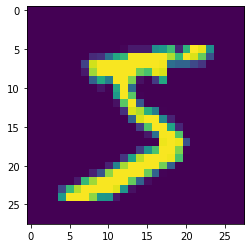

In [ ]:
plt.imshow(single_image)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
#batch_size, width, height, color_channel
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2982 - accuracy: 0.9121 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0436 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0409 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0425 - val_accuracy: 0.9869


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.146392,0.956867,0.058104,0.9820
1,0.048421,0.984817,0.043601,0.9854
2,0.031124,0.990100,0.040870,0.9860
3,0.021339,0.993433,0.042506,0.9869


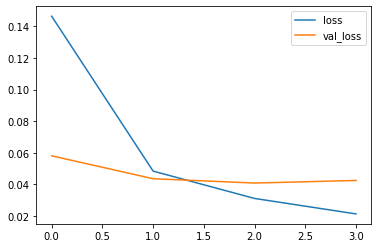

In [ ]:
metrics[['loss', 'val_loss']].plot()

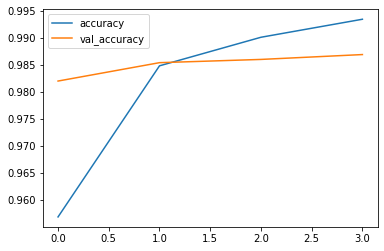

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04250618442893028, 0.9868999719619751]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
 predictions = np.argmax(model.predict(x_test), axis=1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
 confusion_matrix(y_test, predictions)

array([[ 973,    0,    1,    0,    0,    1,    2,    1,    2,    0],
       [   0, 1132,    1,    0,    0,    0,    2,    0,    0,    0],
       [   1,    4, 1021,    0,    1,    0,    0,    3,    2,    0],
       [   0,    1,    2, 1005,    0,    1,    0,    0,    1,    0],
       [   0,    0,    6,    0,  967,    0,    3,    0,    0,    6],
       [   2,    0,    0,    8,    0,  879,    3,    0,    0,    0],
       [   2,    2,    0,    0,    1,    1,  951,    0,    1,    0],
       [   0,    2,   10,    1,    1,    0,    0,  997,    1,   16],
       [   4,    3,    4,    1,    2,    1,    1,    1,  948,    9],
       [   0,    1,    0,    1,    6,    5,    0,    0,    0,  996]])

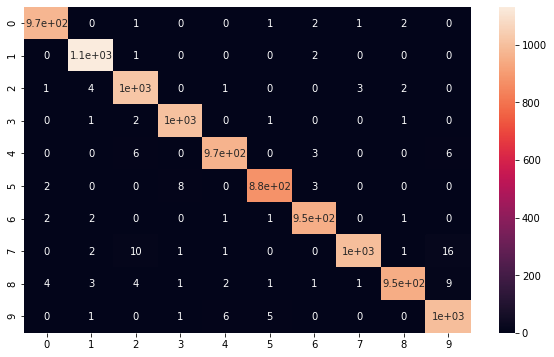

In [ ]:
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)


In [ ]:
my_number = x_test[9]
np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)))

9